# Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### 2) 데이터 로딩

In [5]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : income과 이탈여부

* 가설2 : 핸드폰 가격과 이탈여부

* 가설3 : 만족도와 이탈여부

* 가설4 : 월 초과 이탈여부

* 가설5 : 평균 통화시간 이탈여부

* 가설6 : 대학졸업여부 이탈여부

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) 이탈여부

In [6]:
var = 'CHURN'

In [7]:
mobile[var].isna().sum()

0

In [8]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

0    9131
1    8869
Name: CHURN, dtype: int64
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


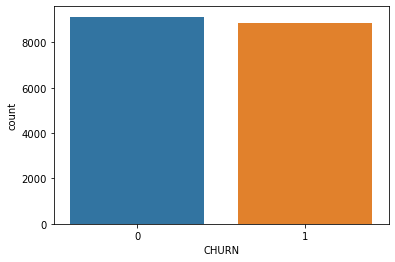

In [9]:
sns.countplot(mobile[var])
plt.show()

In [10]:
# 이탈여부는 범주형 데이터로 이탈한사람과 아닌사람의 비율은 거의 반반이다.

### 2) 소득

In [11]:
var = 'INCOME'

In [12]:
mobile[var].isna().sum()

0

In [13]:
mobile[var].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

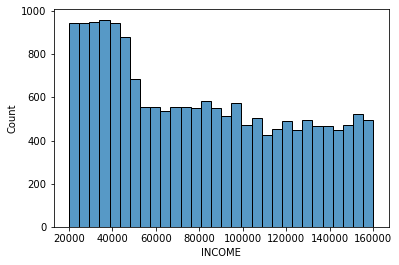

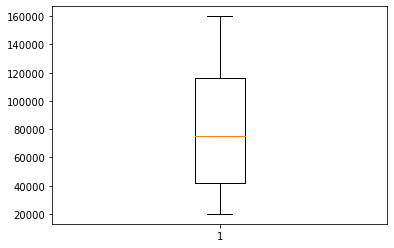

[42151.5 20007. ]
[116082.25 159983.  ]


In [14]:
sns.histplot(mobile[var], bins = 30)
plt.show()

box = plt.boxplot(mobile[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

In [15]:
# 숫자형 변수로 주로 연봉 50000달러 아래의 사용자들이 많이 포진되어 있다.

### 3) 핸드폰 기기가격

In [16]:
var='HANDSET_PRICE'

In [17]:
mobile[var].isna().sum()

0

In [18]:
mobile[var].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

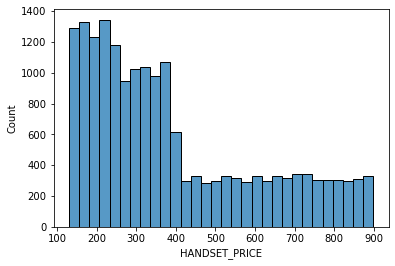

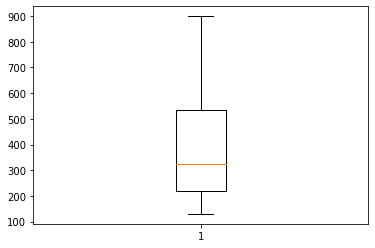

[219. 130.]
[536. 899.]


In [19]:
sns.histplot(mobile[var], bins = 30)
plt.show()

box = plt.boxplot(mobile[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

In [20]:
# 숫자형 변수로 주로 400달러 아래의 기기를 사용하는 사용자들이 많다. 평균값도 390이다. 핸드폰 요금과 요금제, 만족도
# 잔여 통화량의 상관관계를 파악해볼 필요가 있다.

### 4) 만족도

In [21]:
var='REPORTED_SATISFACTION'

In [22]:
mobile[var].isna().sum()

38

In [23]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


In [26]:
mobile[var]=mobile[var].fillna('very_unsat')
mobile[var].isna().sum()

0

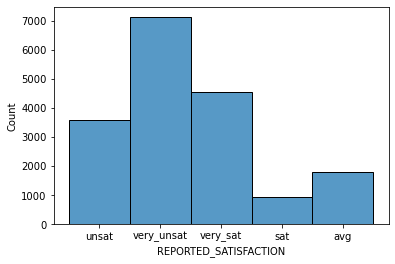

In [27]:
mobile[var].fillna('very_unsat')
sns.histplot(mobile[var])
plt.show()



In [28]:
# 범주형 변수로 불만족하는 사용자가 약 60퍼센트 만족하는 사용자가 30퍼센트로 불만족하는 사용자가 약 2배 많다. 
# 이변량 분석으로 만족도조사와 이탈여부를 비교해봐야한다
# 만족도 조사에서 불만족하는 사람들의 원인을 찾아볼 필요가 있다.

### 5) 초과사용

In [29]:
var='OVERAGE' 

In [30]:
mobile[var].isna().sum()

0

In [31]:
mobile[var].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

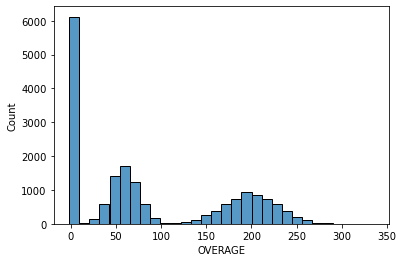

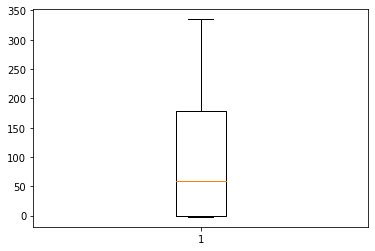

[ 0. -2.]
[179. 335.]


In [32]:
sns.histplot(mobile[var], bins = 30)
plt.show()

box = plt.boxplot(mobile[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

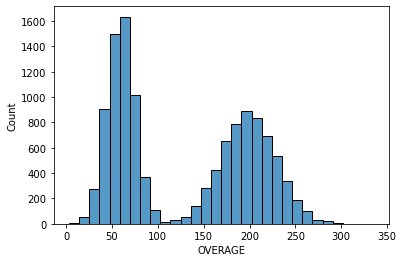

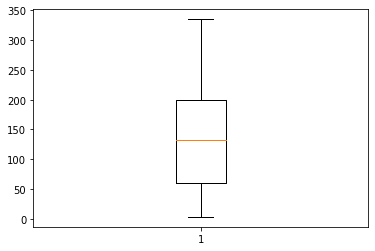

[60.  3.]
[200. 335.]


In [33]:
# 초과사용하지 않은 사용자들을 따로 분류해 계산해보자

data2=mobile.loc[mobile['OVERAGE'] > 0]
data2[var].describe()

sns.histplot(data2[var], bins = 30)
plt.show()

box = plt.boxplot(data2[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

In [34]:
#  overage가 50분과 200분 근처에 포집해 있는데 왜 그런지 이유를 알아봐야 할 것 같다.
#  약 30퍼센트의 사용자가 추가 사용 통화량이 없는데 이 수치가 다른 경쟁사와 비교해볼 필요가 있다
#  통화를 추가사용하는 사용자들의 민족도를 확인해볼 필요가 있을것 같다.

### 6) 평균 통화시간

In [35]:
var='AVERAGE_CALL_DURATION'

In [36]:
mobile[var].isna().sum()

0

In [37]:
mobile[var].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

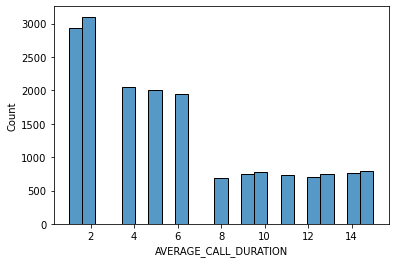

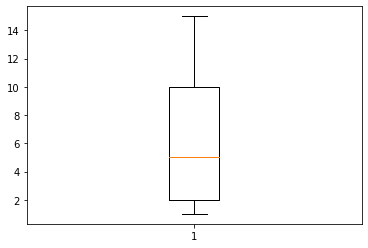

[2. 1.]
[10. 15.]


In [38]:
sns.histplot(mobile[var])
plt.show()

box = plt.boxplot(mobile[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

In [39]:
# 1~2시간만 통화를 하는 사용자가 대다수이다. 통화그룹을 3그룹으로 나누어서 범주셩으로 분석해볼 필요가 있을 것 같다.

### 7) 대학 졸업 여부

In [40]:
var='COLLEGE'

In [41]:
mobile[var].isna().sum()

0

In [42]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


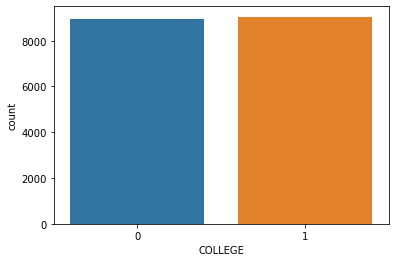

In [43]:
sns.countplot(mobile[var])
plt.show()

In [44]:
#  범주형 데이터로 제일 뜬금없었던 데이터다.
#  추가된 이유가 있을 것 같아서 조사해보았는데 아직까진 잘 모르겠다.
#  이탈여부와 같이 분석해봐야 할것 같다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [45]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

In [46]:
feature='COLLEGE'

In [47]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

COLLEGE,0,1
CHURN,,
0,0.515697,0.49895
1,0.484303,0.50105


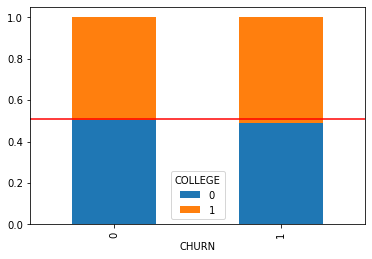

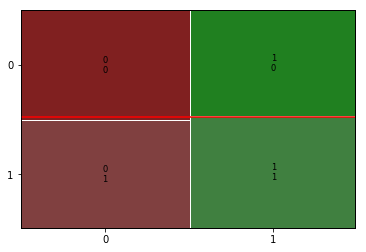

In [48]:
temp = pd.crosstab(mobile[target], mobile[feature], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

mosaic(mobile, [target,feature])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [49]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 4.982102934693503
p-value 0.025610833478220536


In [50]:
# p-value값이 0.05보다 크고 시각화에서도 차이가 거의 보이지 않는다.
# 특이한 변수라서 알아봤는데 큰 차이가 있지 않은것 같다.

#### 2) REPORTED_SATISFACTION --> CHURN

In [51]:
feature='REPORTED_SATISFACTION'

In [52]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.500844
1,0.472868,0.472103,0.500836,0.488382,0.499156


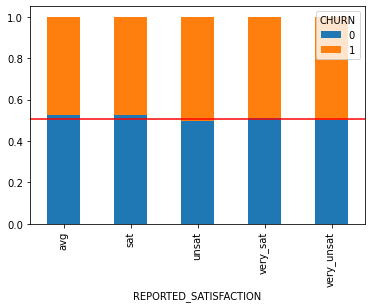

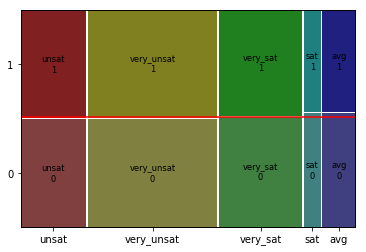

In [53]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

mosaic(mobile, [feature,target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [54]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 6.9002592374195935
p-value 0.14125388637767003


In [55]:
# 평가 여부와 이탈율은 큰 상관관계가 보이지 않았다.

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [56]:
feature='CONSIDERING_CHANGE_OF_PLAN'

In [57]:
pd.crosstab(mobile[target], mobile[feature], normalize='columns')

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.511565,0.510853,0.513304,0.500274,0.475992
1,0.488435,0.489147,0.486696,0.499726,0.524008


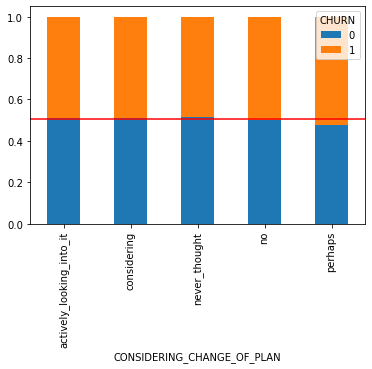

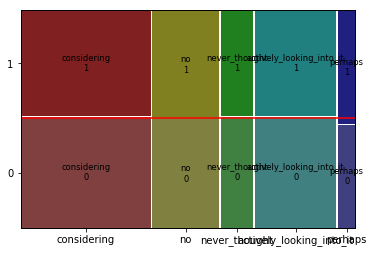

In [58]:
temp = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

mosaic(mobile, [feature,target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [59]:
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.421434419620689
p-value 0.2467222586679969


In [60]:
# 실제로 통신사를 이동할 계획이냐에 대한 설문조사이다.
# 차이가 거의 없는 데이터이다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [61]:
feature='INCOME'
mobile[feature].mean()
target_mean=mobile[target].mean()

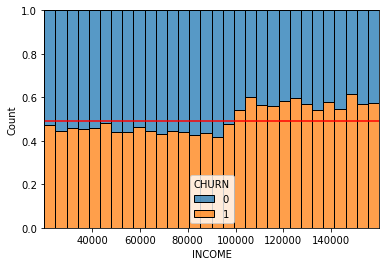

In [62]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

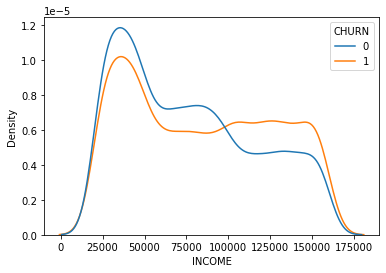

In [63]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [64]:
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


In [65]:
# pvalue값이 0.05이하로 연소득과 이탈율의 약간의 차이가 있다.
# 흥미로운 점이라면 년 소득 10000달러 이상부터 이탈율이 증가한다.
# 10000달러 이상의 사용자들의 이탈율의 원인을 알아볼 필요가 있다.

In [66]:
feature='HOUSE'
mobile[feature].mean()
target_mean=mobile[target].mean()

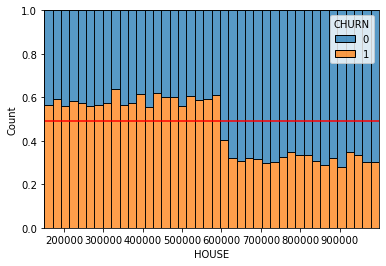

In [67]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 40)
plt.axhline(target_mean, color = 'r')
plt.show()

In [68]:
data2=mobile.loc[mobile['HOUSE'] > 580000]


var='CHURN'
print(data2[var].value_counts())
print(data2[var].value_counts()/ len(data2[var]))

0    4254
1    2156
Name: CHURN, dtype: int64
0    0.663651
1    0.336349
Name: CHURN, dtype: float64


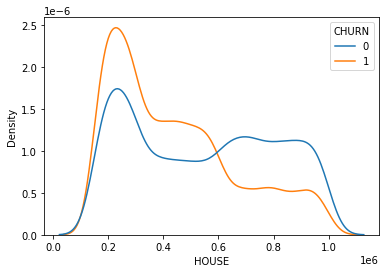

In [69]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [70]:
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687266
         Iterations 2
HOUSE    6.401120e-47
dtype: float64


#### 2) HANDSET--> CHURN


In [71]:
feature='HANDSET_PRICE'
mobile[feature].mean()
target_mean=mobile[target].mean()

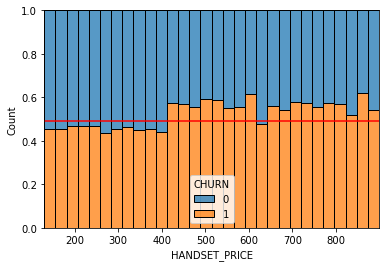

In [72]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

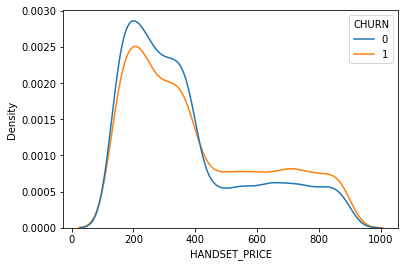

In [73]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [74]:
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


In [75]:
# 핸드폰 가격과 이탈율 사이의 관계가 존재한다.
# 이전에 핸드폰 가격의 단변량분석에서 기기값 평균이 390이 나왔는데 평균 이상의 가격의 핸드폰을 사용하는 사용자들의 이탈율이
# 증가하는 모습을 볼 수 있다
# 기기값을 범주형으로 만들어 저가와 고가 이용자로 분류해 분석해 볼 필요가 있을 것 같다.

#### 3) OVERAGE --> CHURN


In [76]:
feature='OVERAGE'
mobile[feature].mean()
target_mean=mobile[target].mean()

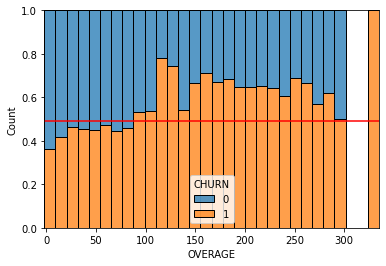

In [77]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

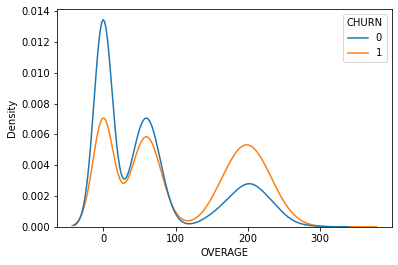

In [78]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [79]:
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


In [80]:
# p-value값이 거의 0에 수렴하고 시각화에서도 차이가 많이 난다. 추가통화량과 이탈률의 차이가 있다
# 이탈율은 오버타임 100분 이후로 크게 증가하는데 이 관계에 대해서 알아 볼 필요가 있을 것 같다.

#### 4) AVERAGE_CALL_DURATION --> CHURN


In [81]:
feature='AVERAGE_CALL_DURATION'
mobile[feature].mean()
target_mean=mobile[target].mean()

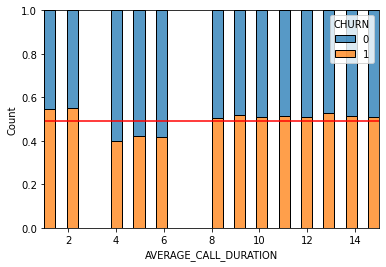

In [82]:
sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

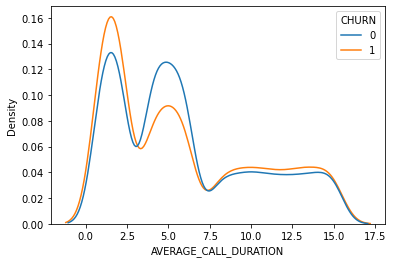

In [83]:
sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

In [84]:
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


In [85]:
# p-value 0.037로 작은 차이를 보이지만 흥미로운 결과를 하나 얻을 수 있었다.
# 위의 초과시간과 이탈율의 분석에서 추가 통화시간을 사용하지 않은 사용자들의 충성도가 높은것을 볼 수 있는데 이번 결과에서는 
# 약 1시가 반 내외의 통화량을 사용하는 사용자들의 이탈률이 크고 5시간 내외의 사용자들의 이탈률이 적은것을 알 수 있다.
# 이 두 그룹을 분석해볼 필요가 있을 것 같다.

## 4.관계 정리

### 1) 강한관계의 변수

In [86]:
# INCOME, OVERAGE

### 2) 약한관계의 변수

In [87]:
# HANDSET, AVERAGE_CALL_DURATION

### 3) 관계 없음

In [88]:
#  COLLEGE ,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

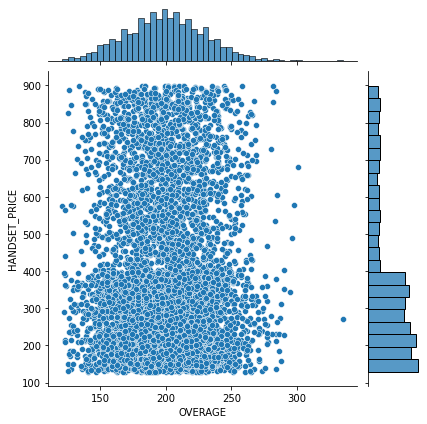

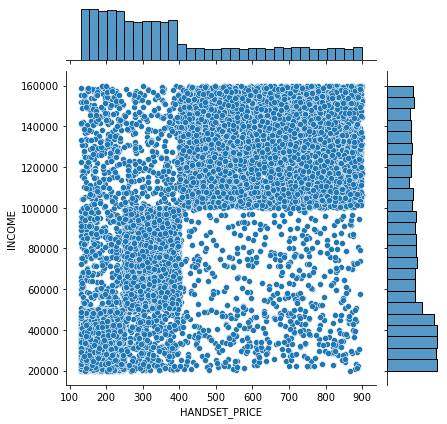

In [89]:
data2=mobile.loc[mobile['OVERAGE'] > 120]
sns.jointplot(x='OVERAGE', y='HANDSET_PRICE',data = data2)
plt.show()

sns.jointplot(x='HANDSET_PRICE', y='INCOME',data = mobile)
plt.show()


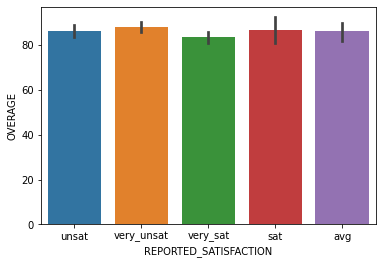

In [90]:
feature='REPORTED_SATISFACTION'
sns.barplot(x=feature, y="OVERAGE", data=mobile)
plt.show()

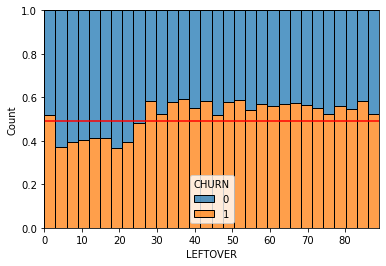

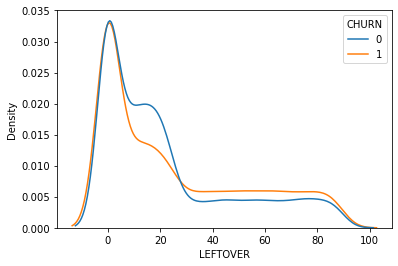

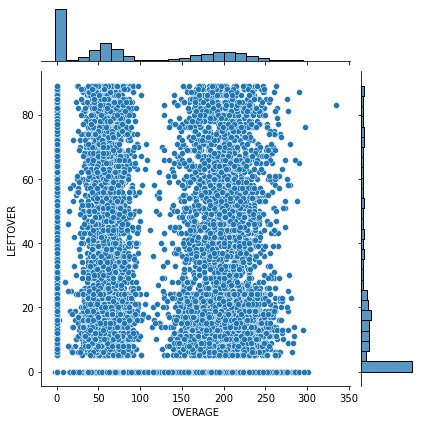

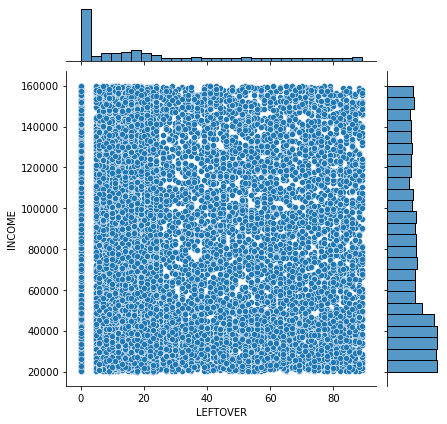

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


In [91]:
feature='LEFTOVER'
mobile[feature].mean()
target_mean=mobile[target].mean()

sns.histplot(x=feature, data = mobile, hue = target, multiple = 'fill', bins = 30)
plt.axhline(target_mean, color = 'r')
plt.show()

sns.kdeplot(x=feature, data = mobile, hue =target, common_norm=False)
plt.show()

sns.jointplot(x='OVERAGE', y='LEFTOVER',data = mobile)
plt.show()

sns.jointplot(x='LEFTOVER', y='INCOME',data = mobile)
plt.show()
temp = mobile.loc[mobile[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

In [92]:

# 가장 차이가 심했던 OVERAGE에서 이탈율의 원인을 찾아보려고 했다.
# 먼저 OVERAGE 200분 전후로 이탈율이 높게 확인되었다. 따라서 소득과 OVERAGE와의 관계, 기기값과 OVERAGE와의 관계를 확인해보려고
# 했지만 별다른 관계를 알 수 없었다.

# 다음으로는 10000달러의 연봉 이상의 사용자의 이탈율이 높고 기기값 390달러 이상의 사용자들의 이탈율이 높은 것을 확인해 볼 수 
# 있었다.

# 연봉 10000달러 이상의 사용자는 대체로 390달러 이상의 기기를 사용하는 집단이 확인되었다. 저 집단에서의 이탈율이 높으므로 
# vip멤버쉽 등을 만들어서 관리하거나 ott서비스와의 연계로 저 집단을 관리해야 할 것 같다.


In [93]:
data2=mobile.loc[mobile['HANDSET_PRICE'] > 390]
data3=data2.loc[mobile['INCOME']>100000]

var='CHURN'

In [94]:
print(data3[var].value_counts())
print(data3[var].value_counts()/ len(data3[var]))

1    3189
0    2350
Name: CHURN, dtype: int64
1    0.575736
0    0.424264
Name: CHURN, dtype: float64


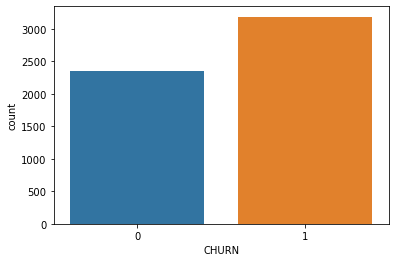

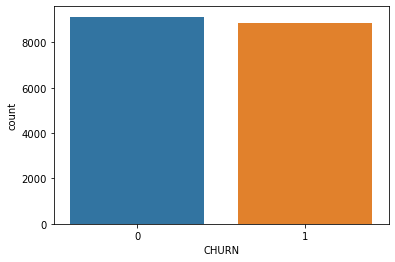

In [95]:
sns.countplot(data3[var])

plt.show()

sns.countplot(mobile[var])

plt.show()

very_unsat    2193
very_sat      1400
unsat         1085
avg            557
sat            304
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.395920
very_sat      0.252753
unsat         0.195884
avg           0.100560
sat           0.054884
Name: REPORTED_SATISFACTION, dtype: float64


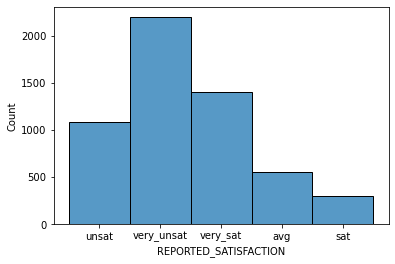

In [96]:
var='REPORTED_SATISFACTION'
print(data3[var].value_counts())
print(data3[var].value_counts()/ len(data3[var]))
sns.histplot(data3[var])
plt.show()


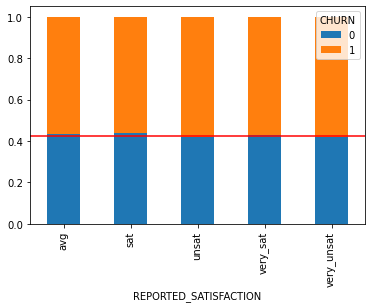

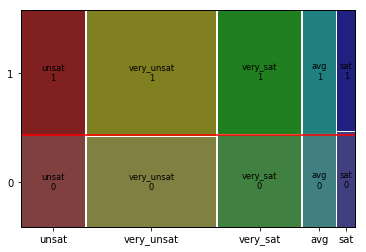

In [97]:
feature='REPORTED_SATISFACTION'
pd.crosstab(data3[target], data3[feature], normalize='columns')

temp = pd.crosstab(data3[feature], data3[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1- data3[target].mean(), color = 'r')
plt.show()

mosaic(data3, [feature,target])
plt.axhline(1- data3[target].mean(), color = 'r')
plt.show()